<a href="https://colab.research.google.com/github/ayushtankha/TSP/blob/main/TSP_Model_1_Neural_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Importing Libraries and Dataset**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet
import pickle

**DATA HEADER INFO**


NASA/POWER CERES/MERRA2 Native Resolution Daily Data




**Dates (month/day/year): 01/01/1983 through 08/01/2023**
*   Location: Latitude  35.0382   Longitude 9.4849
*   Elevation from MERRA-2: Average for 0.5 x 0.625 degree lat/lon region = 408.34 meters

**The value for missing source data that cannot be computed or is outside of the sources availability range: -**

Parameter(s):



* ALLSKY_SFC_SW_DWN       CERES SYN1deg -
All Sky Surface Shortwave Downward Irradiance (kW-hr/m^2/day)

* ALLSKY_KT               CERES SYN1deg - All Sky Insolation Clearness Index (dimensionless)

* ALLSKY_SFC_LW_DWN       CERES SYN1deg - All Sky Surface Longwave Downward Irradiance (W/m^2)

* ALLSKY_SFC_PAR_TOT      CERES SYN1deg - All Sky Surface PAR Total (W/m^2)

* CLRSKY_SFC_PAR_TOT      CERES SYN1deg - Clear Sky Surface PAR Total (W/m^2)

* ALLSKY_SFC_UV_INDEX     CERES SYN1deg - All Sky Surface UV Index (dimensionless)

* ALLSKY_SFC_UVA          CERES SYN1deg - All Sky Surface UVA Irradiance (W/m^2)

* ALLSKY_SFC_UVB          CERES SYN1deg - All Sky Surface UVB Irradiance (W/m^2)

* T2M                     MERRA-2 - Temperature at 2 Meters (C)

* T2MDEW                  MERRA-2 - Dew/Frost Point at 2 Meters (C)

* T2M_MAX                 MERRA-2 - Temperature at 2 Meters Maximum (C)

* T2M_MIN                 MERRA-2 - Temperature at 2 Meters Minimum (C)

* TS                      MERRA-2 - Earth Skin Temperature (C)

* WS10M                   MERRA-2 - Wind Speed at 10 Meters (m/s)

* WD10M                   MERRA-2 - Wind Direction at 10 Meters (Degrees)

* WS50M                   MERRA-2 - Wind Speed at 50 Meters (m/s)

* WD50M                   MERRA-2 - Wind Direction at 50 Meters (Degrees)

* PS                      MERRA-2 - Surface Pressure (kPa)

* PRECTOTCORR             MERRA-2 - Precipitation Corrected (mm/day)

* RH2M                    MERRA-2 - Relative Humidity at 2 Meters (%)








In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
weather_df = pd.read_csv('/content/drive/MyDrive/Telecom/Tunisia Weather All Data.csv')

In [4]:

weather_df = weather_df[weather_df['YEAR']!=1983]

In [5]:
weather_df.columns

Index(['YEAR', 'MO', 'DY', 'ALLSKY_SFC_SW_DWN', 'ALLSKY_KT',
       'ALLSKY_SFC_LW_DWN', 'ALLSKY_SFC_PAR_TOT', 'CLRSKY_SFC_PAR_TOT',
       'ALLSKY_SFC_UV_INDEX', 'ALLSKY_SFC_UVA', 'ALLSKY_SFC_UVB', 'T2M',
       'T2MDEW', 'T2M_MAX', 'T2M_MIN', 'TS', 'WS10M', 'WD10M', 'WS50M',
       'WD50M', 'PS', 'PRECTOTCORR', 'RH2M'],
      dtype='object')

In [6]:
weather_df['DATE'] = weather_df['YEAR'].astype(str) + '-'+ weather_df['MO'].astype(str) +'-' +  weather_df['DY'].astype(str)

# 22 features in total and 14823 data points

In [7]:
weather_df['DATE'] = pd.to_datetime(weather_df['DATE'])


In [8]:
weather_df.head()

,YEAR,MO,DY,ALLSKY_SFC_SW_DWN,ALLSKY_KT,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UV_INDEX,ALLSKY_SFC_UVA,...,T2M_MIN,TS,WS10M,WD10M,WS50M,WD50M,PS,PRECTOTCORR,RH2M,DATE
365,1984,1,1,2.03,0.45,283.6,39.4,-999.0,-999.0,-999.0,...,4.22,8.96,2.42,268.31,4.05,283.12,97.75,0.01,77.19,1984-01-01
366,1984,1,2,2.74,0.59,270.9,52.9,-999.0,-999.0,-999.0,...,4.33,8.85,2.64,254.25,3.92,255.06,97.88,0.00,63.88,1984-01-02
367,1984,1,3,2.56,0.55,291.6,49.7,-999.0,-999.0,-999.0,...,6.08,9.15,3.36,266.31,5.36,266.94,97.57,0.00,54.12,1984-01-03
368,1984,1,4,2.65,0.57,274.5,51.2,-999.0,-999.0,-999.0,...,4.86,9.35,2.89,248.12,5.30,251.19,96.80,0.12,49.00,1984-01-04
369,1984,1,5,1.57,0.34,310.6,31.5,-999.0,-999.0,-999.0,...,4.45,6.12,7.02,146.88,9.49,147.50,96.79,2.59,73.50,1984-01-05


In [9]:
weather_df.drop(['YEAR','MO','DY','CLRSKY_SFC_PAR_TOT',
       'ALLSKY_SFC_UV_INDEX', 'ALLSKY_SFC_UVA', 'ALLSKY_SFC_UVB'], axis = 1, inplace = True)

In [10]:
columns = weather_df.columns.tolist()

# Move the last column to the first position
columns = [columns[-1]] + columns[:-1]

# Reorder the DataFrame using the new column order
weather_df = weather_df[columns]

weather_df

,DATE,ALLSKY_SFC_SW_DWN,ALLSKY_KT,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_PAR_TOT,T2M,T2MDEW,T2M_MAX,T2M_MIN,TS,WS10M,WD10M,WS50M,WD50M,PS,PRECTOTCORR,RH2M
365,1984-01-01,2.03,0.45,283.60,39.4,9.14,5.12,15.94,4.22,8.96,2.42,268.31,4.05,283.12,97.75,0.01,77.19
366,1984-01-02,2.74,0.59,270.90,52.9,10.09,2.67,18.83,4.33,8.85,2.64,254.25,3.92,255.06,97.88,0.00,63.88
367,1984-01-03,2.56,0.55,291.60,49.7,10.67,1.18,19.44,6.08,9.15,3.36,266.31,5.36,266.94,97.57,0.00,54.12
368,1984-01-04,2.65,0.57,274.50,51.2,9.92,-1.13,18.74,4.86,9.35,2.89,248.12,5.30,251.19,96.80,0.12,49.00
369,1984-01-05,1.57,0.34,310.60,31.5,6.67,2.05,10.01,4.45,6.12,7.02,146.88,9.49,147.50,96.79,2.59,73.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14818,2023-07-28,7.35,-999.00,431.38,-999.0,32.46,16.51,42.51,23.64,35.21,4.52,194.25,5.59,197.81,96.77,0.00,45.12
14819,2023-07-29,7.48,-999.00,433.92,-999.0,35.83,11.48,46.36,24.97,37.42,5.73,210.88,7.56,212.00,96.61,0.00,33.69
14820,2023-07-30,7.11,-999.00,442.92,-999.0,34.77,17.39,44.59,27.04,37.63,1.55,141.94,1.70,142.75,96.73,10.23,40.62
14821,2023-07-31,7.34,-999.00,410.23,-999.0,32.71,16.79,39.90,26.26,35.37,1.86,110.81,2.50,112.00,96.71,0.00,41.38


In [11]:

weather_df.dtypes

DATE                  datetime64[ns]
ALLSKY_SFC_SW_DWN            float64
ALLSKY_KT                    float64
ALLSKY_SFC_LW_DWN            float64
ALLSKY_SFC_PAR_TOT           float64
T2M                          float64
T2MDEW                       float64
T2M_MAX                      float64
T2M_MIN                      float64
TS                           float64
WS10M                        float64
WD10M                        float64
WS50M                        float64
WD50M                        float64
PS                           float64
PRECTOTCORR                  float64
RH2M                         float64
dtype: object

In [12]:
X_prophet = weather_df[['DATE', 'PRECTOTCORR']]
X_prophet.columns = ['ds', 'y']
X_prophet.head()

,ds,y
365,1984-01-01,0.01
366,1984-01-02,0.00
367,1984-01-03,0.00
368,1984-01-04,0.12
369,1984-01-05,2.59


In [13]:
X_prophet.shape

(14458, 2)

## **2. Data Visualization**

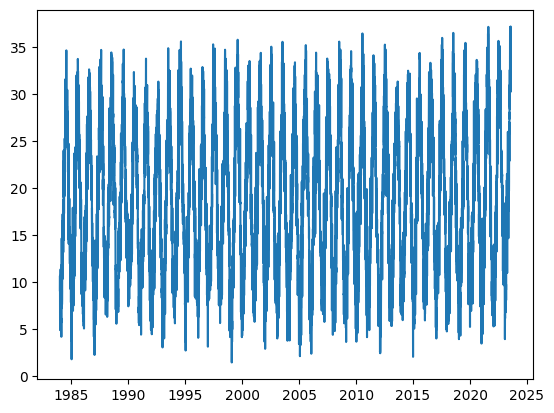

In [14]:
plt.plot(weather_df['DATE'], weather_df['T2M'])
plt.show()

<Axes: >

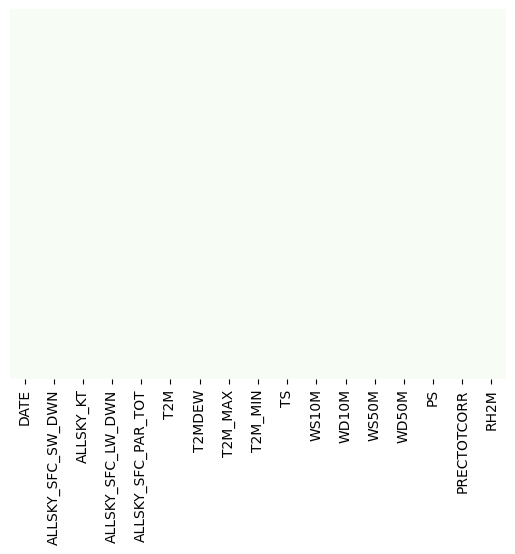

In [15]:
#Checking for null values in dataset

sns.heatmap(weather_df.isnull(), yticklabels = False, cbar = False, cmap = 'Greens')

array([[<Axes: title={'center': 'DATE'}>,
        <Axes: title={'center': 'ALLSKY_SFC_SW_DWN'}>,
        <Axes: title={'center': 'ALLSKY_KT'}>,
        <Axes: title={'center': 'ALLSKY_SFC_LW_DWN'}>],
       [<Axes: title={'center': 'ALLSKY_SFC_PAR_TOT'}>,
        <Axes: title={'center': 'T2M'}>,
        <Axes: title={'center': 'T2MDEW'}>,
        <Axes: title={'center': 'T2M_MAX'}>],
       [<Axes: title={'center': 'T2M_MIN'}>,
        <Axes: title={'center': 'TS'}>,
        <Axes: title={'center': 'WS10M'}>,
        <Axes: title={'center': 'WD10M'}>],
       [<Axes: title={'center': 'WS50M'}>,
        <Axes: title={'center': 'WD50M'}>,
        <Axes: title={'center': 'PS'}>,
        <Axes: title={'center': 'PRECTOTCORR'}>],
       [<Axes: title={'center': 'RH2M'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

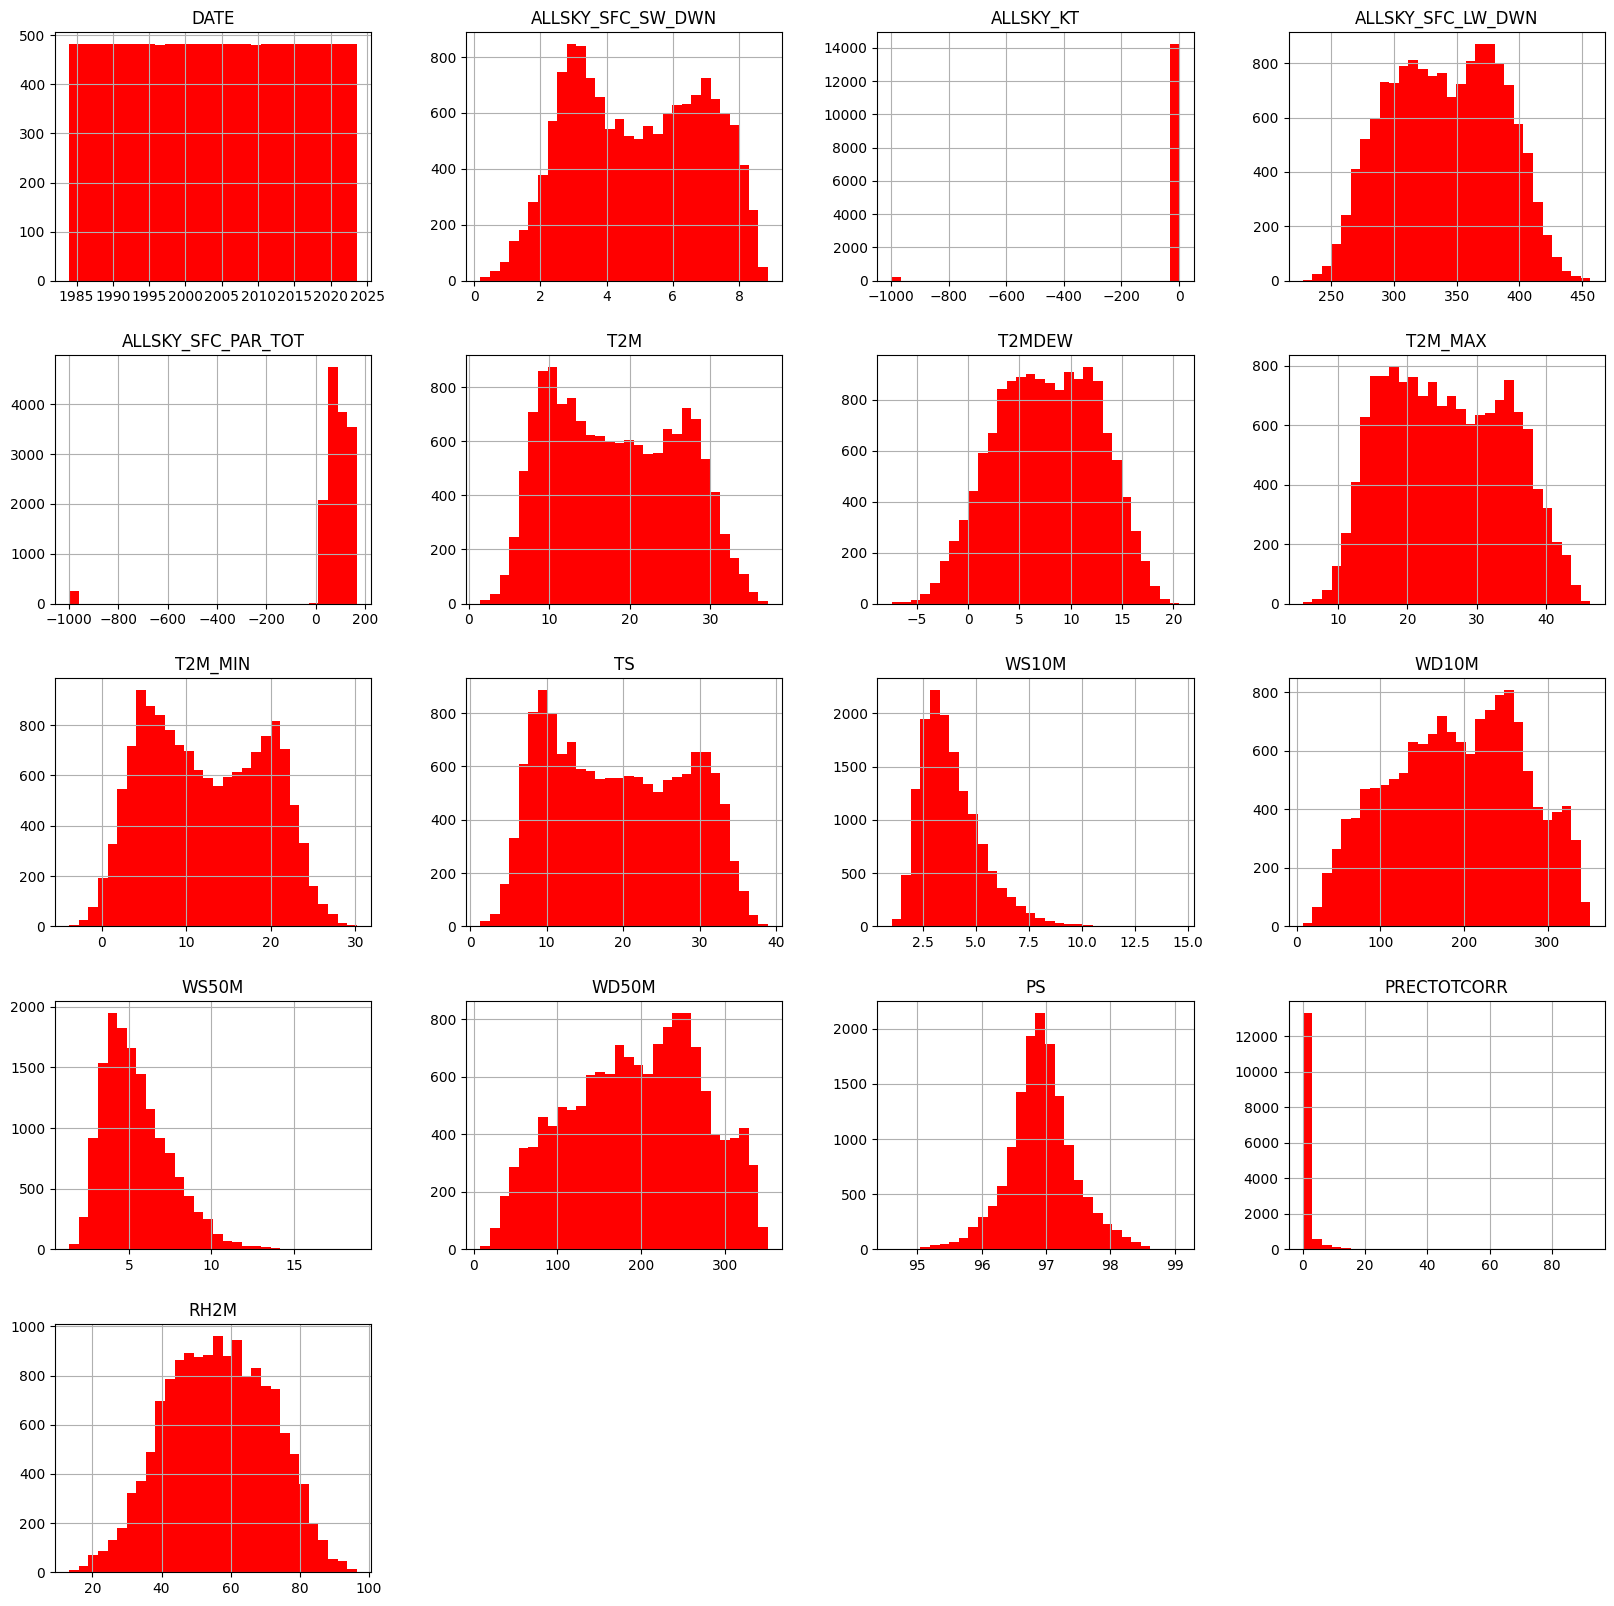

In [16]:
weather_df.hist(bins = 30, figsize = (20,20), color = 'r' )

<ipython-input-17-a75a57a8da9e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = weather_df.corr()


<Axes: >

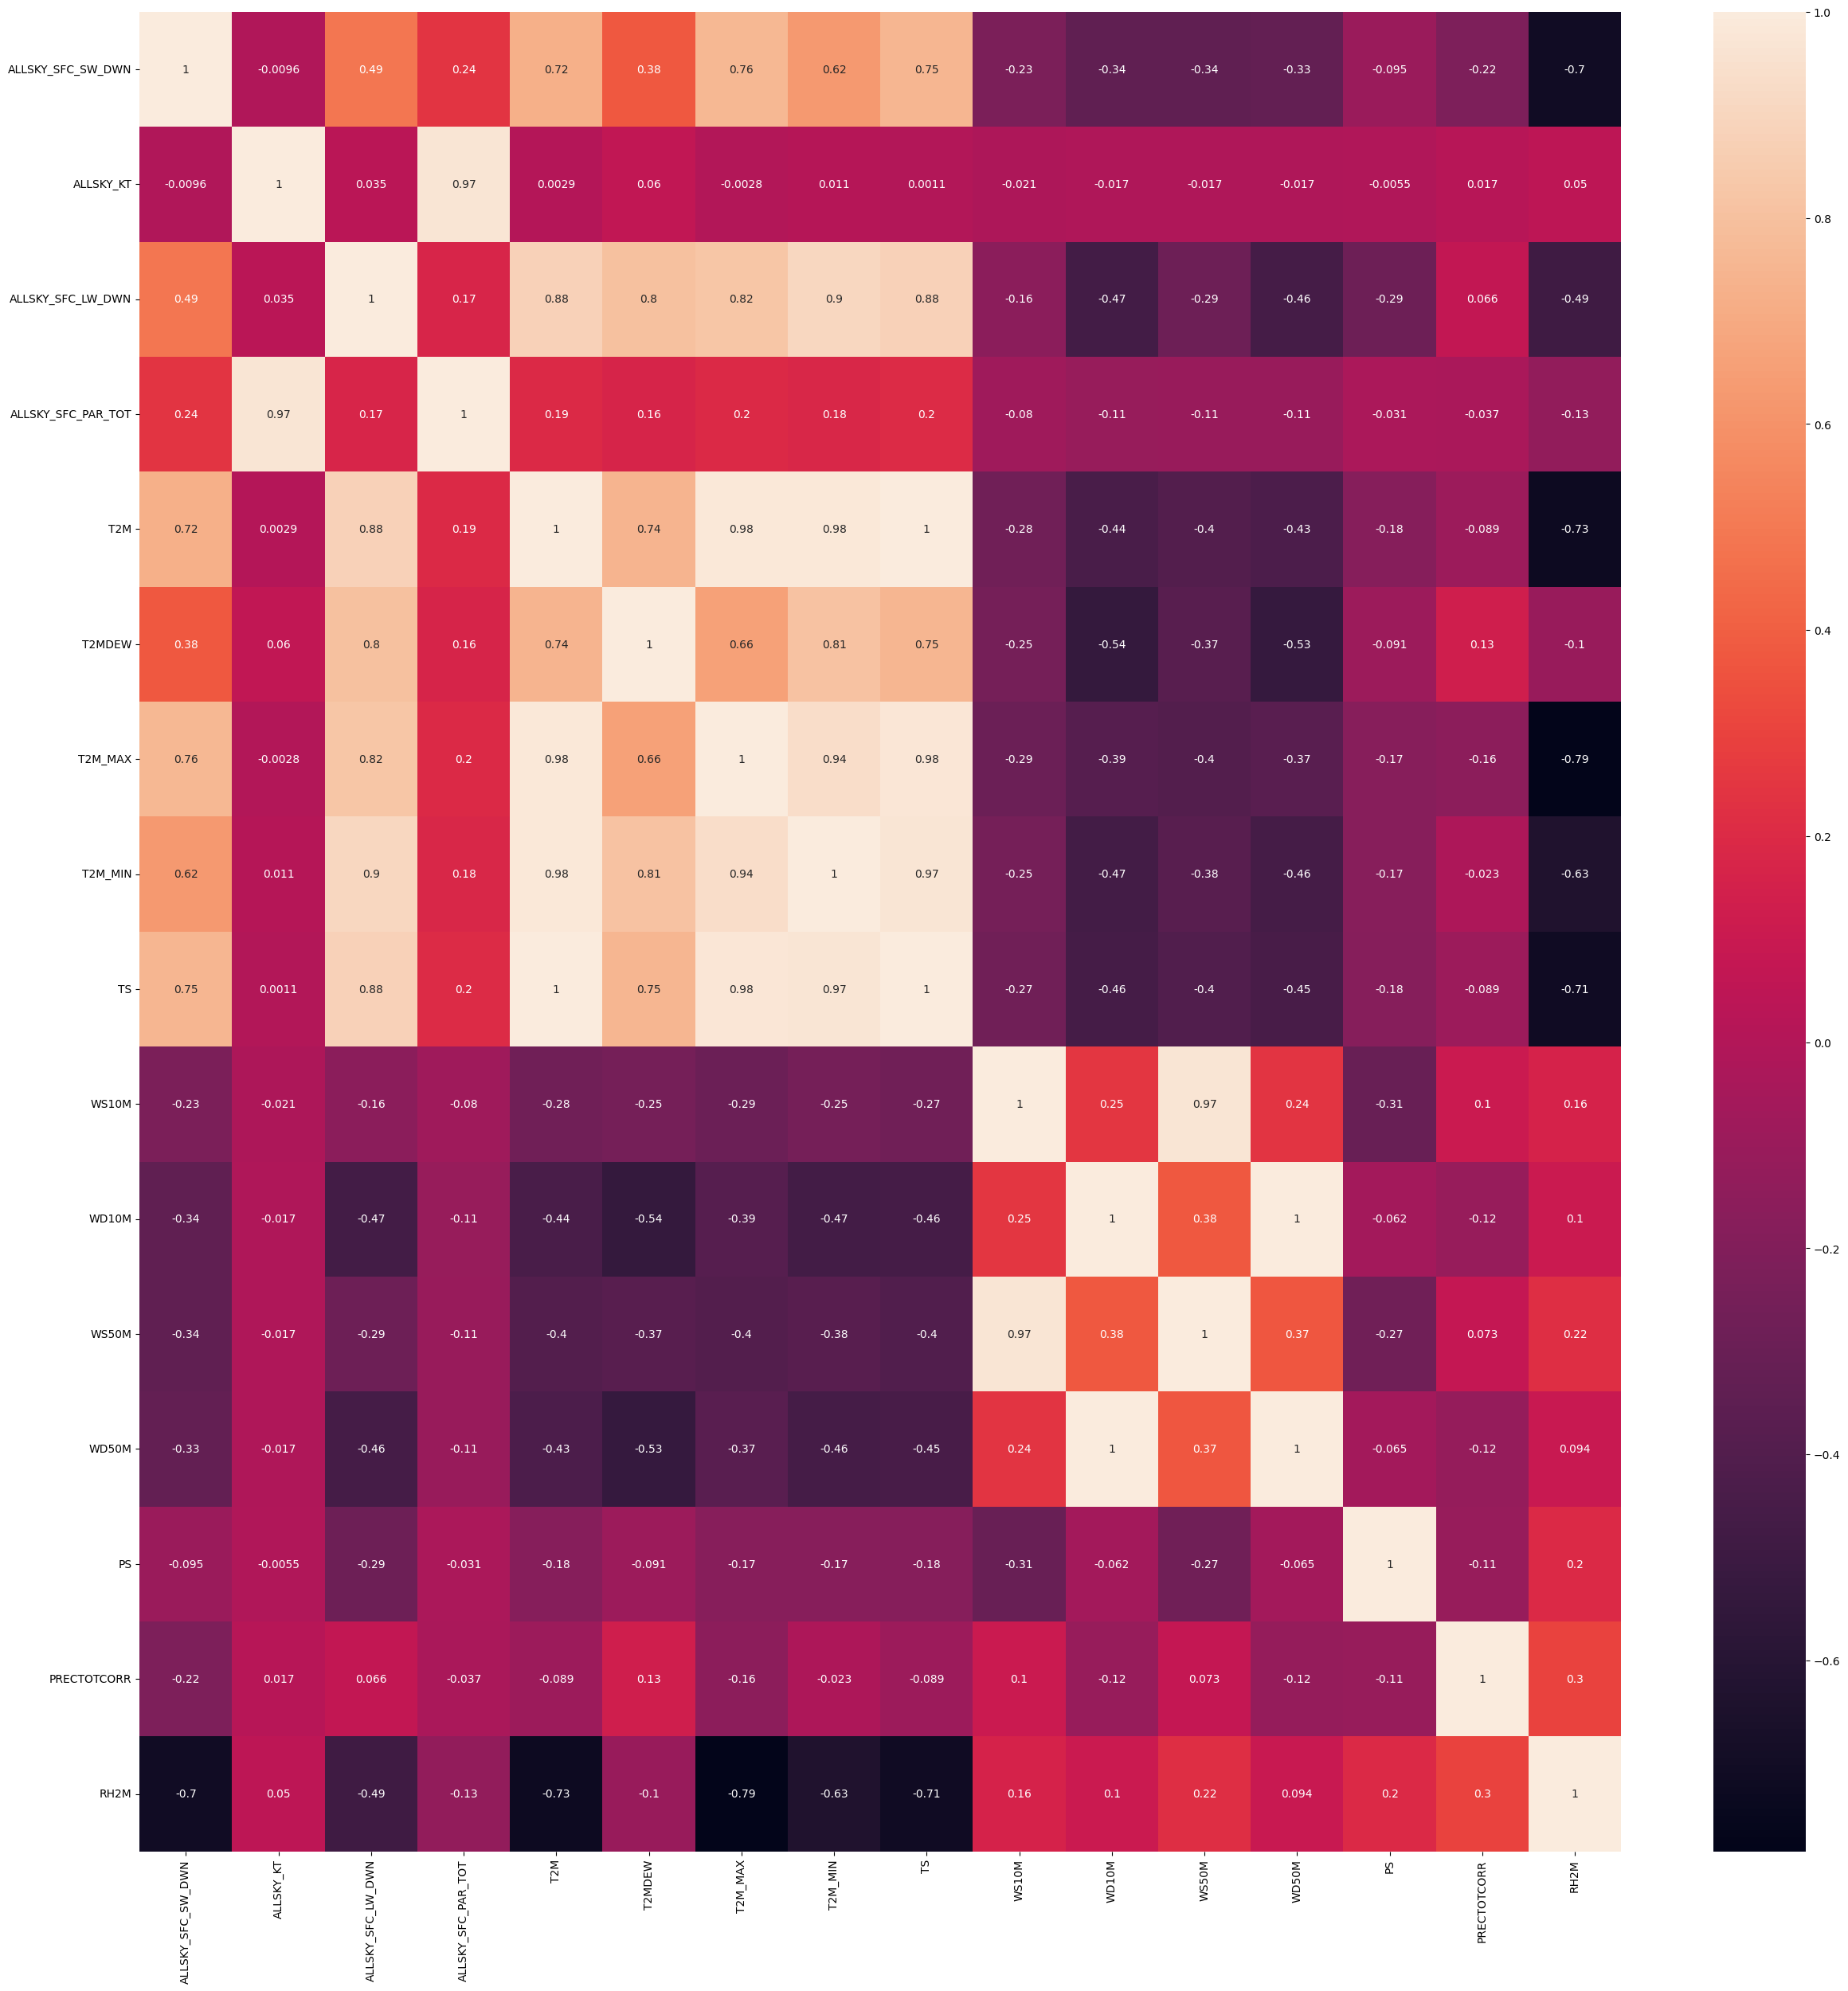

In [17]:
correlations = weather_df.corr()
f, ax = plt.subplots(figsize = (30,30))
sns.heatmap(correlations, annot = True)



<ipython-input-18-dc860fa7bb8c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = weather_df.corr()


PRECTOTCORR           1.000000
RH2M                  0.298684
T2MDEW                0.134049
WS10M                 0.101536
WS50M                 0.072807
ALLSKY_SFC_LW_DWN     0.065793
ALLSKY_KT             0.017259
T2M_MIN              -0.023191
ALLSKY_SFC_PAR_TOT   -0.037191
TS                   -0.088917
T2M                  -0.089322
PS                   -0.109798
WD10M                -0.115651
WD50M                -0.118293
T2M_MAX              -0.156441
ALLSKY_SFC_SW_DWN    -0.219916
Name: PRECTOTCORR, dtype: float64

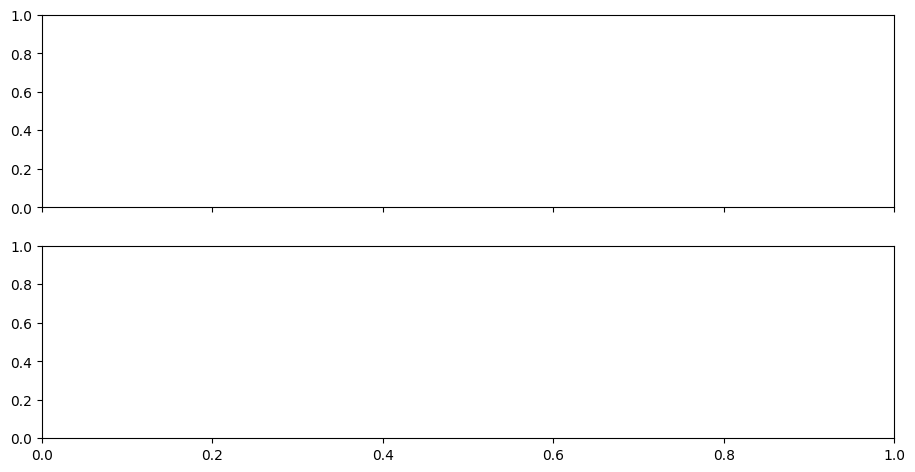

In [18]:
correlations = weather_df.corr()
rainfall_corr = correlations['PRECTOTCORR'].sort_values(ascending = False)
fig, ax1 = plt.subplots(2, 1, figsize=(11, 5.5), sharex=True)
rainfall_corr

<ipython-input-19-2b8addf0944e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = weather_df.corr()


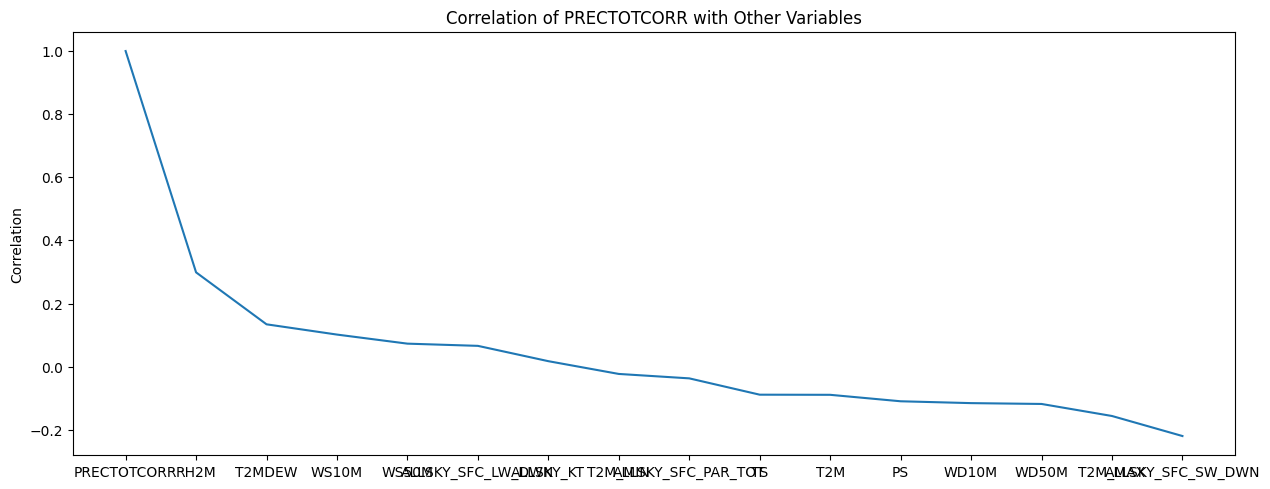

In [19]:
import matplotlib.pyplot as plt

correlations = weather_df.corr()
rainfall_corr = correlations['PRECTOTCORR'].sort_values(ascending=False)

fig, ax1 = plt.subplots(figsize=(15, 5.5))
ax1.plot(rainfall_corr)

# You can also add labels and a title for better visualization:
ax1.set_ylabel('Correlation')
ax1.set_title('Correlation of PRECTOTCORR with Other Variables')

plt.show()









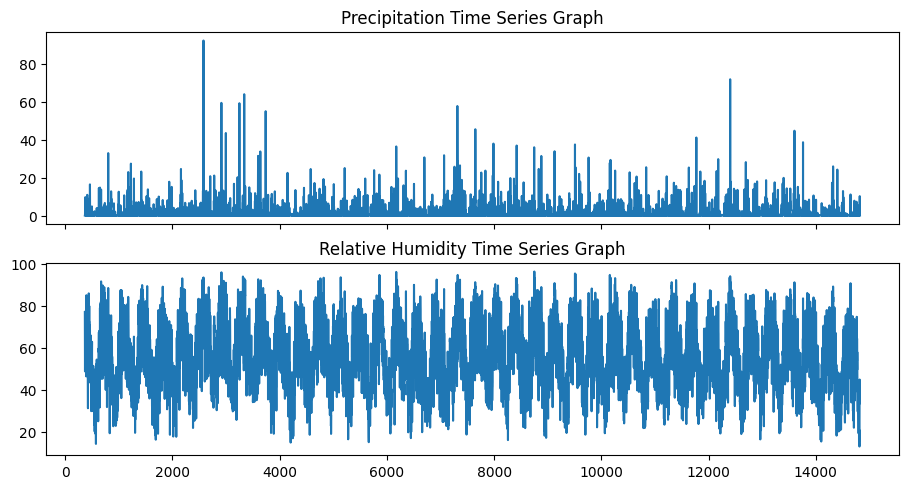

In [20]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11, 5.5), sharex=True)
ax1.plot(weather_df['PRECTOTCORR'])
ax1.set_title('Precipitation Time Series Graph')
ax2.plot(weather_df['RH2M'])
ax2.set_title('Relative Humidity Time Series Graph');

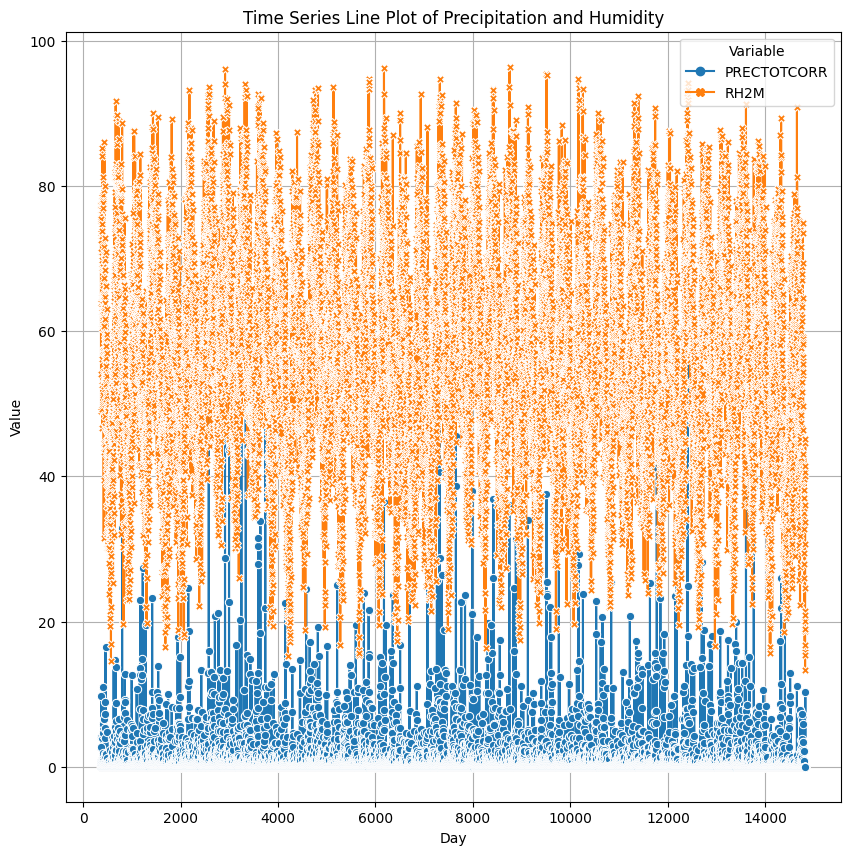

In [21]:
# Lets see precipitaion vs Humidity

plt.figure(figsize = (10,10)),
sns.lineplot(data = weather_df[['PRECTOTCORR','RH2M']],markers = True, dashes = False)
plt.title('Time Series Line Plot of Precipitation and Humidity')
plt.xlabel('Day')
plt.ylabel('Value')
plt.legend(title='Variable')
plt.grid(True)
plt.show()


### **3. Create Testing and Training Dataset and Perform Data Cleaning**

In [22]:
weather_df.head()

,DATE,ALLSKY_SFC_SW_DWN,ALLSKY_KT,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_PAR_TOT,T2M,T2MDEW,T2M_MAX,T2M_MIN,TS,WS10M,WD10M,WS50M,WD50M,PS,PRECTOTCORR,RH2M
365,1984-01-01,2.03,0.45,283.6,39.4,9.14,5.12,15.94,4.22,8.96,2.42,268.31,4.05,283.12,97.75,0.01,77.19
366,1984-01-02,2.74,0.59,270.9,52.9,10.09,2.67,18.83,4.33,8.85,2.64,254.25,3.92,255.06,97.88,0.00,63.88
367,1984-01-03,2.56,0.55,291.6,49.7,10.67,1.18,19.44,6.08,9.15,3.36,266.31,5.36,266.94,97.57,0.00,54.12
368,1984-01-04,2.65,0.57,274.5,51.2,9.92,-1.13,18.74,4.86,9.35,2.89,248.12,5.30,251.19,96.80,0.12,49.00
369,1984-01-05,1.57,0.34,310.6,31.5,6.67,2.05,10.01,4.45,6.12,7.02,146.88,9.49,147.50,96.79,2.59,73.50


In [23]:
#weather_df = weather_df.loc[weather_df['YEAR']!=1983]


In [24]:

X = weather_df[['ALLSKY_SFC_SW_DWN', 'ALLSKY_KT',
       'ALLSKY_SFC_LW_DWN', 'ALLSKY_SFC_PAR_TOT', 'T2M',
       'T2MDEW', 'T2M_MAX', 'T2M_MIN', 'TS', 'WS10M', 'WD10M', 'WS50M',
       'WD50M', 'PS', 'RH2M']]


In [25]:
y = weather_df['PRECTOTCORR']

In [26]:
X

,ALLSKY_SFC_SW_DWN,ALLSKY_KT,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_PAR_TOT,T2M,T2MDEW,T2M_MAX,T2M_MIN,TS,WS10M,WD10M,WS50M,WD50M,PS,RH2M
365,2.03,0.45,283.60,39.4,9.14,5.12,15.94,4.22,8.96,2.42,268.31,4.05,283.12,97.75,77.19
366,2.74,0.59,270.90,52.9,10.09,2.67,18.83,4.33,8.85,2.64,254.25,3.92,255.06,97.88,63.88
367,2.56,0.55,291.60,49.7,10.67,1.18,19.44,6.08,9.15,3.36,266.31,5.36,266.94,97.57,54.12
368,2.65,0.57,274.50,51.2,9.92,-1.13,18.74,4.86,9.35,2.89,248.12,5.30,251.19,96.80,49.00
369,1.57,0.34,310.60,31.5,6.67,2.05,10.01,4.45,6.12,7.02,146.88,9.49,147.50,96.79,73.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14818,7.35,-999.00,431.38,-999.0,32.46,16.51,42.51,23.64,35.21,4.52,194.25,5.59,197.81,96.77,45.12
14819,7.48,-999.00,433.92,-999.0,35.83,11.48,46.36,24.97,37.42,5.73,210.88,7.56,212.00,96.61,33.69
14820,7.11,-999.00,442.92,-999.0,34.77,17.39,44.59,27.04,37.63,1.55,141.94,1.70,142.75,96.73,40.62
14821,7.34,-999.00,410.23,-999.0,32.71,16.79,39.90,26.26,35.37,1.86,110.81,2.50,112.00,96.71,41.38


In [27]:
y.head(3)

365    0.01
366    0.00
367    0.00
Name: PRECTOTCORR, dtype: float64

# **3. TRAINING NEURAL PROPHET (TIME SERIES CROSS VALIDATION)**

## Time-series cross-validation is a technique that is also referred to as a rolling origin backtest. It involves dividing the data into several folds. * During the first fold, we train the model on a portion of the data and then evaluate its performance on the next set of data points, which are determined by the fold_pct parameter (percentage of samples in each fold). * In the next fold, we include the evaluation data from the previous fold in the training data and then evaluate the model’s performance on a later set of data points. * This process is repeated until the final fold, where the evaluation data reaches the end of the available data. Essentially, the forecast origin “rolls” forward as we move from one fold to the next.

Note: Before making any actual forecasts, re-fit the model on all data available, else you are greatly reducing your forecast accuracy!

In [28]:
!pip uninstall prophet torchaudio torchtext torchvision torchdata -y

Found existing installation: prophet 1.1.4
Uninstalling prophet-1.1.4:
  Successfully uninstalled prophet-1.1.4
Found existing installation: torchaudio 2.0.2+cu118
Uninstalling torchaudio-2.0.2+cu118:
  Successfully uninstalled torchaudio-2.0.2+cu118
Found existing installation: torchtext 0.15.2
Uninstalling torchtext-0.15.2:
  Successfully uninstalled torchtext-0.15.2
Found existing installation: torchvision 0.15.2+cu118
Uninstalling torchvision-0.15.2+cu118:
  Successfully uninstalled torchvision-0.15.2+cu118
Found existing installation: torchdata 0.6.1
Uninstalling torchdata-0.6.1:
  Successfully uninstalled torchdata-0.6.1


In [29]:
!pip install git+https://github.com/ourownstory/neural_prophet.git numpy==1.23.5


  Cloning https://github.com/ourownstory/neural_prophet.git to /tmp/pip-req-build-2kqjdjb1
  Running command git clone --filter=blob:none --quiet https://github.com/ourownstory/neural_prophet.git /tmp/pip-req-build-2kqjdjb1
  Resolved https://github.com/ourownstory/neural_prophet.git to commit 50d5e4175740c586e9372ffccfcfccc3beac41c1
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.2/378.2 kB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.5/829.5 kB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519

In [39]:
X_prophet.head()

,ds,y
365,1984-01-01,0.01
366,1984-01-02,0.00
367,1984-01-03,0.00
368,1984-01-04,0.12
369,1984-01-05,2.59


# **4. AUGMENTED DICKEY FULLER TEST**


In [31]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 30)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [32]:
print(adf_test(y))


Results of Dickey-Fuller Test:
Test Statistic                   -47.440625
p-value                            0.000000
#Lags Used                         4.000000
Number of Observations Used    14453.000000
Critical Value (1%)               -3.430803
Critical Value (5%)               -2.861740
Critical Value (10%)              -2.566876
dtype: float64
None


In [50]:
from statsmodels.tsa.stattools import kpss


def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags = 'auto')
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [51]:
kpss_test(y)


Results of KPSS Test:
Test Statistic            0.341577
p-value                   0.100000
Lags Used                29.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


<ipython-input-50-81d17e1d3352>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression="c", nlags = 'auto')


In [30]:
from neuralprophet import NeuralProphet
from neuralprophet import NeuralProphet, set_log_level


df_train, df_val = NeuralProphet().split_df(X_prophet, valid_p=0.2)


ModuleNotFoundError: ignored

In [31]:
print("Dataset size:", len(X_prophet))
print("Train dataset size:", len(df_train))
print("Validation dataset size:", len(df_val))

Dataset size: 14458
Train dataset size: 11567
Validation dataset size: 2891


In [32]:
METRICS = ["MAE", "RMSE"]
METRICS_VAL = ["MAE_val", "RMSE_val"]
params = {"seasonality_mode": "multiplicative", "learning_rate": 0.01, "yearly_seasonality": True,
    "weekly_seasonality" : True }

In [33]:

metrics_train = pd.DataFrame(columns=METRICS)
metrics_test = pd.DataFrame(columns=METRICS_VAL)

In [34]:
folds = NeuralProphet(**params).crossvalidation_split_df(X_prophet, freq="D", k=5, fold_pct=0.10, fold_overlap_pct=0.05)


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.993% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.993% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.987% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.987% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.931% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.931% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Loss_test         │    0.07794085144996643    │
│          MAE_val          │     1.22565495967865      │
│         RMSE_val          │     2.787783622741699     │
│       RegLoss_test        │            0.0            │
└───────────────────────────┴───────────────────────────┘

WARNING - (py.warnings._showwarnmsg) - <ipython-input-35-11486f95a14e>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_train = metrics_train.append(train[METRICS].iloc[-1])

  metrics_train = metrics_train.append(train[METRICS].iloc[-1])

WARNING - (py.warnings._showwarnmsg) - <ipython-input-35-11486f95a14e>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_test = metrics_test.append(test[METRICS_VAL].iloc[-1])

  metrics_test = metrics_test.append(test[METRICS_VAL].iloc[-1])

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.989% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.989% of the data.
INFO - (NP.df_utils._infer_frequency)

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.931% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.931% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Loss_test         │    0.08897776901721954    │
│          MAE_val          │     1.134963870048523     │
│         RMSE_val          │    2.8493943214416504     │
│       RegLoss_test        │            0.0            │
└───────────────────────────┴───────────────────────────┘

WARNING - (py.warnings._showwarnmsg) - <ipython-input-35-11486f95a14e>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_train = metrics_train.append(train[METRICS].iloc[-1])

  metrics_train = metrics_train.append(train[METRICS].iloc[-1])

WARNING - (py.warnings._showwarnmsg) - <ipython-input-35-11486f95a14e>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_test = metrics_test.append(test[METRICS_VAL].iloc[-1])

  metrics_test = metrics_test.append(test[METRICS_VAL].iloc[-1])

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.99% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.99% of the data.
INFO - (NP.df_utils._infer_frequency) -

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.931% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.931% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Loss_test         │    0.08962036669254303    │
│          MAE_val          │    1.0854130983352661     │
│         RMSE_val          │    2.8731493949890137     │
│       RegLoss_test        │            0.0            │
└───────────────────────────┴───────────────────────────┘

WARNING - (py.warnings._showwarnmsg) - <ipython-input-35-11486f95a14e>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_train = metrics_train.append(train[METRICS].iloc[-1])

  metrics_train = metrics_train.append(train[METRICS].iloc[-1])

WARNING - (py.warnings._showwarnmsg) - <ipython-input-35-11486f95a14e>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_test = metrics_test.append(test[METRICS_VAL].iloc[-1])

  metrics_test = metrics_test.append(test[METRICS_VAL].iloc[-1])

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.991% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.991% of the data.
INFO - (NP.df_utils._infer_frequency)

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.931% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.931% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Loss_test         │    0.10268551111221313    │
│          MAE_val          │     1.170109510421753     │
│         RMSE_val          │    3.1325526237487793     │
│       RegLoss_test        │            0.0            │
└───────────────────────────┴───────────────────────────┘

WARNING - (py.warnings._showwarnmsg) - <ipython-input-35-11486f95a14e>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_train = metrics_train.append(train[METRICS].iloc[-1])

  metrics_train = metrics_train.append(train[METRICS].iloc[-1])

WARNING - (py.warnings._showwarnmsg) - <ipython-input-35-11486f95a14e>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_test = metrics_test.append(test[METRICS_VAL].iloc[-1])

  metrics_test = metrics_test.append(test[METRICS_VAL].iloc[-1])

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.992% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.992% of the data.
INFO - (NP.df_utils._infer_frequency)

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.931% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.931% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Loss_test         │    0.07206018269062042    │
│          MAE_val          │    0.9482766389846802     │
│         RMSE_val          │    2.5374016761779785     │
│       RegLoss_test        │            0.0            │
└───────────────────────────┴───────────────────────────┘

WARNING - (py.warnings._showwarnmsg) - <ipython-input-35-11486f95a14e>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_train = metrics_train.append(train[METRICS].iloc[-1])

  metrics_train = metrics_train.append(train[METRICS].iloc[-1])

WARNING - (py.warnings._showwarnmsg) - <ipython-input-35-11486f95a14e>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_test = metrics_test.append(test[METRICS_VAL].iloc[-1])

  metrics_test = metrics_test.append(test[METRICS_VAL].iloc[-1])



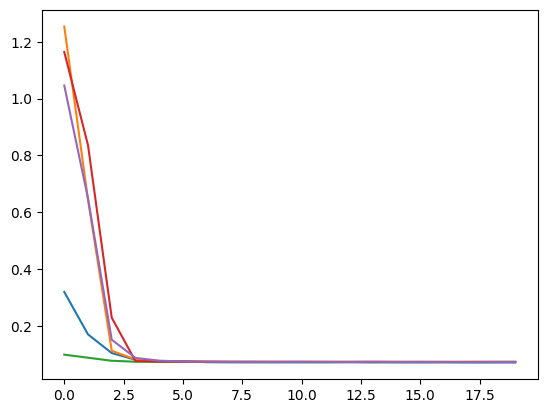

In [35]:
for df_train, df_test in folds:
    m = NeuralProphet(**params)
    m.set_plotting_backend("plotly-static")
    train = m.fit(df=df_train, freq="D", progress = "plot", epochs = 20)
    test = m.test(df=df_test)
    metrics_train = metrics_train.append(train[METRICS].iloc[-1])
    metrics_test = metrics_test.append(test[METRICS_VAL].iloc[-1])

In [36]:

#m = NeuralProphet()
#metrics = m.fit(df_train, validation_df=df_val, progress="plot")


# **4. Making Predictions**

In [37]:
future = m.make_future_dataframe(X_prophet, periods = 31)
forecast = m.predict(future)
forecast

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.993% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.993% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.774% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 96.774% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.774% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 96.774% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 204it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2023-08-02,None,0.355527,0.544055,-0.213110,0.024582
1,2023-08-03,None,0.359948,0.544042,-0.205255,0.021161
2,2023-08-04,None,0.352324,0.544030,-0.197211,0.005505
3,2023-08-05,None,0.336866,0.544017,-0.188994,-0.018157
4,2023-08-06,None,0.336339,0.544004,-0.180583,-0.027083
5,2023-08-07,None,0.361032,0.543992,-0.171981,-0.010979
6,2023-08-08,None,0.385782,0.543979,-0.163196,0.004998
7,2023-08-09,None,0.414345,0.543967,-0.154198,0.024577
8,2023-08-10,None,0.420108,0.543954,-0.144993,0.021147
9,2023-08-11,None,0.413871,0.543941,-0.135578,0.005508


In [38]:
forecast['yhat1'].describe()

count    31.000000
mean      0.478548
std       0.099355
min       0.336339
25%       0.400258
50%       0.475577
75%       0.560735
max       0.656584
Name: yhat1, dtype: float64

In [39]:
X_prophet['y'].describe()

count    14458.000000
mean         0.935812
std          3.220171
min          0.000000
25%          0.000000
50%          0.030000
75%          0.450000
max         92.400000
Name: y, dtype: float64

In [40]:
X_prophet.shape

(14458, 2)

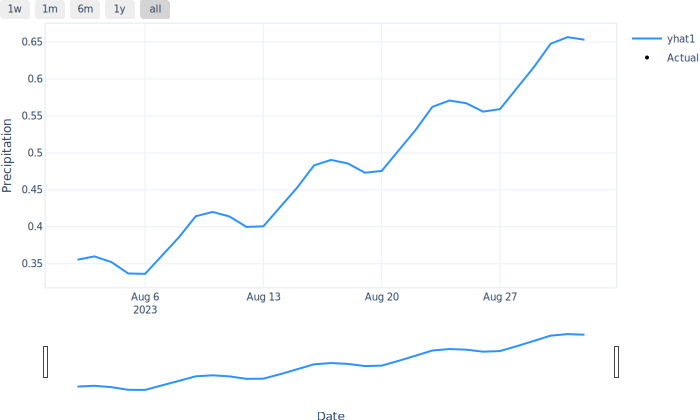

In [41]:
import numpy as np
import matplotlib.pyplot as plt
m.plot(forecast, xlabel = "Date", ylabel = "Precipitation", ax = ax)



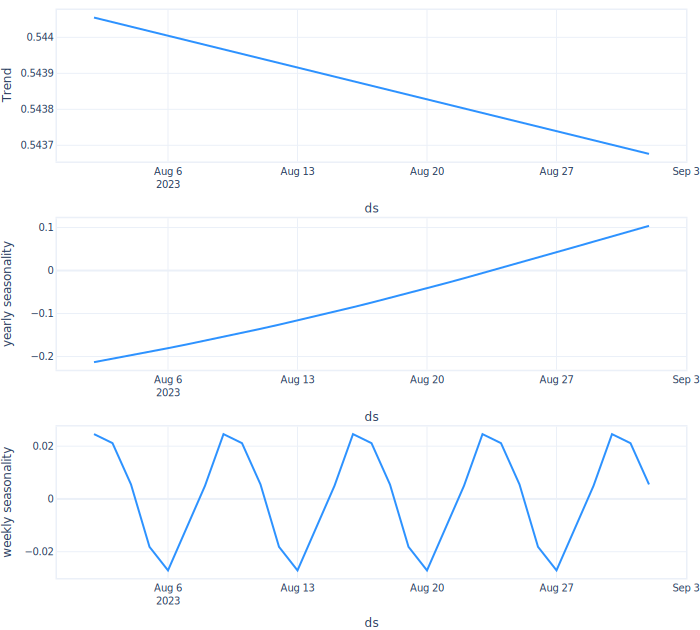

In [42]:
fig_comp = m.plot_components(forecast)
fig_comp

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4130 sha256=9b390a8115496322f4b97ce27e825f089149c2b5e75451d9b4ca411e3cf68733
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


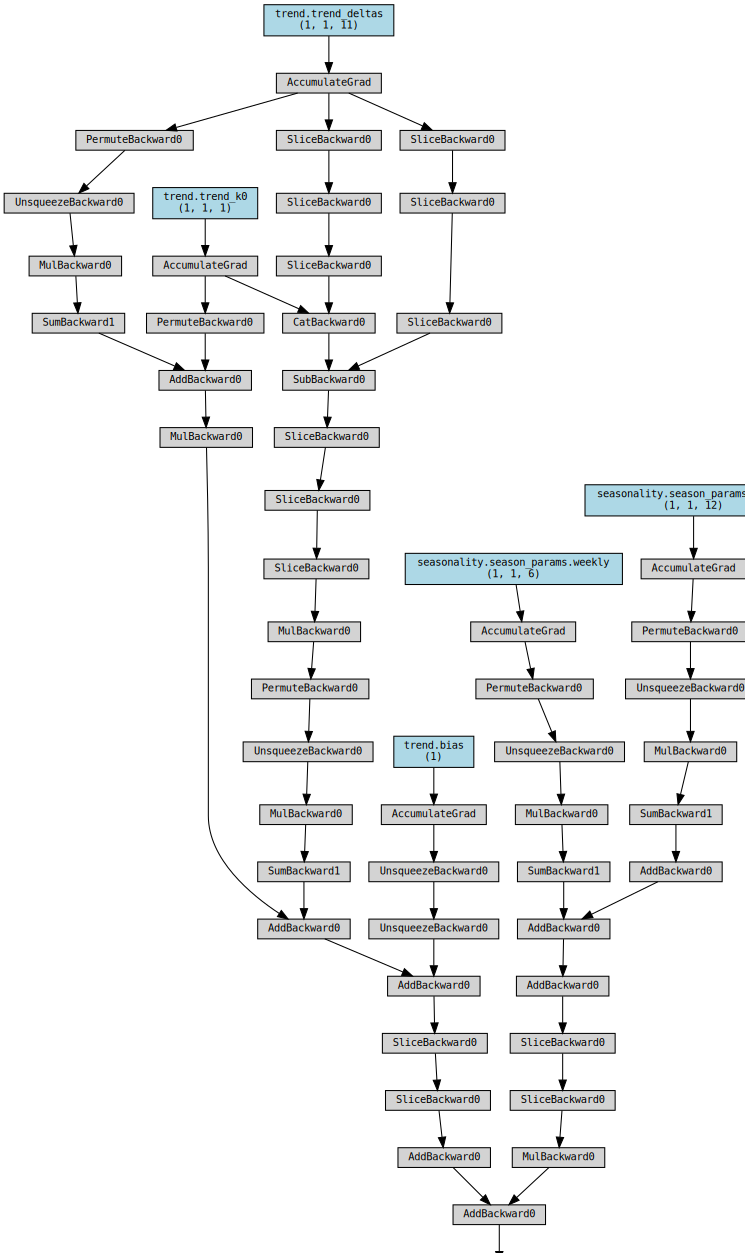

In [43]:
try:
    # it already installed dependencies
    from torchsummary import summary
    from torchviz import make_dot
except:
    # install graphviz on system
    import platform

    if "Darwin" == platform.system():
        !brew install graphviz
    elif "Linux" == platform.system():
        !sudo apt install graphviz
    else:
        print("go to  https://www.graphviz.org/download/")
    # Next we need to install the following dependencies:
    !pip install torchsummary
    !pip install torch-summary
    !pip install torchviz
    !pip install graphviz
    # import
    from torchsummary import summary
    from torchviz import make_dot

fig = make_dot(m.model.train_epoch_prediction, params=dict(m.model.named_parameters()))
# fig_glob.render(filename='img/fig_glob')
display(fig)

In [44]:
'''fig, ax = plt.subplots(figsize=(14, 10))
ax.plot(metrics["MAE"], '-b', linewidth=6, label="Training Loss")
ax.plot(metrics["MAE_val"], '-r', linewidth=2, label="Validation Loss")

# You can use metrics["SmoothL1Loss"] and metrics["SmoothL1Loss_val"] too.

ax.legend(loc='center right', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel("Epoch", fontsize=28, fontweight="bold")
ax.set_ylabel("Loss", fontsize=28, fontweight="bold")

ax.set_title("Model Loss (MAE)", fontsize=28, fontweight="bold")'''

'fig, ax = plt.subplots(figsize=(14, 10))\nax.plot(metrics["MAE"], \'-b\', linewidth=6, label="Training Loss")\nax.plot(metrics["MAE_val"], \'-r\', linewidth=2, label="Validation Loss")\n\n# You can use metrics["SmoothL1Loss"] and metrics["SmoothL1Loss_val"] too.\n\nax.legend(loc=\'center right\', fontsize=16)\nax.tick_params(axis=\'both\', which=\'major\', labelsize=20)\nax.set_xlabel("Epoch", fontsize=28, fontweight="bold")\nax.set_ylabel("Loss", fontsize=28, fontweight="bold")\n\nax.set_title("Model Loss (MAE)", fontsize=28, fontweight="bold")'

In [45]:
with open('forecast.pkl', 'wb') as f:
  pickle.dump(m,f)


In [46]:
#with open('forecast.pkl', 'wb') as f:
#  m = pickle.load(m,f)

In [47]:
weather_df.columns

Index(['DATE', 'ALLSKY_SFC_SW_DWN', 'ALLSKY_KT', 'ALLSKY_SFC_LW_DWN',
       'ALLSKY_SFC_PAR_TOT', 'T2M', 'T2MDEW', 'T2M_MAX', 'T2M_MIN', 'TS',
       'WS10M', 'WD10M', 'WS50M', 'WD50M', 'PS', 'PRECTOTCORR', 'RH2M'],
      dtype='object')

In [48]:
c = 0
d = 0
for i in weather_df['PRECTOTCORR']:
  d+=1
  if i == 0:
    c+=1

print(c,d)

5666 14458


In [49]:
forecast['yhat1'].head(31)

0     0.355527
1     0.359948
2     0.352324
3     0.336866
4     0.336339
5     0.361032
6     0.385782
7     0.414345
8     0.420108
9     0.413871
10    0.399811
11    0.400704
12    0.426873
13    0.453103
14    0.483175
15    0.490437
16    0.485677
17    0.473197
18    0.475577
19    0.503191
20    0.530856
21    0.562275
22    0.570816
23    0.567277
24    0.555823
25    0.559195
26    0.587586
27    0.615841
28    0.647744
29    0.656584
30    0.653110
Name: yhat1, dtype: float32